# Be able to investigate client requirements for data analysis
# 2.4 Quantitative data analysis

* mean
* median
* standard deviation
* range

## Set up

In [1]:
try:
    import micropip
    await micropip.install(["pyoliteutils", "textblob"])
except:
    pass

In [2]:
from pyoliteutils import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# https://www.delftstack.com/howto/seaborn/size-of-seaborn-plot/
sns.set(rc={"figure.figsize": (16, 5)})

In [3]:
crowds = pd.read_csv("../data/eagles/crowds_with_monthly_weather.csv")
#crowds = pd.read_csv("../data/eagles/crowds_clean.csv")
## https://datascienceparichay.com/article/pandas-extract-year-from-datetime-column/
crowds

,Date,Opponents,Attendance,Year,Day,Month,Month Name,Max Temperature C,Min Temperature C,af days,Rain mm,sun hours
0,1984-09-02,Rochdale,1425,1984,Sunday,9,September,16.7,10.4,0,117.6,86.1
1,1984-09-09,Fulham,1145,1984,Sunday,9,September,16.7,10.4,0,117.6,86.1
2,1984-09-23,Salford,1159,1984,Sunday,9,September,16.7,10.4,0,117.6,86.1
3,1984-10-14,Runcorn,1076,1984,Sunday,10,October,14.3,7.7,0,82.7,75.6
4,1984-10-28,Bridgend,826,1984,Sunday,10,October,14.3,7.7,0,82.7,75.6
...,...,...,...,...,...,...,...,...,...,...,...,...
583,2022-07-24,Workington,644,2022,Sunday,7,July,23.2,14.5,0,23.8,187.8*
584,2022-08-07,Whitehaven,727,2022,Sunday,8,August,23.9,13.6,0,56.4,234.5*
585,2022-08-12,Halifax,569,2022,Friday,8,August,23.9,13.6,0,56.4,234.5*
586,2022-09-02,Featherstone,912,2022,Friday,9,September,18.4,11.1,0,50,124.8*


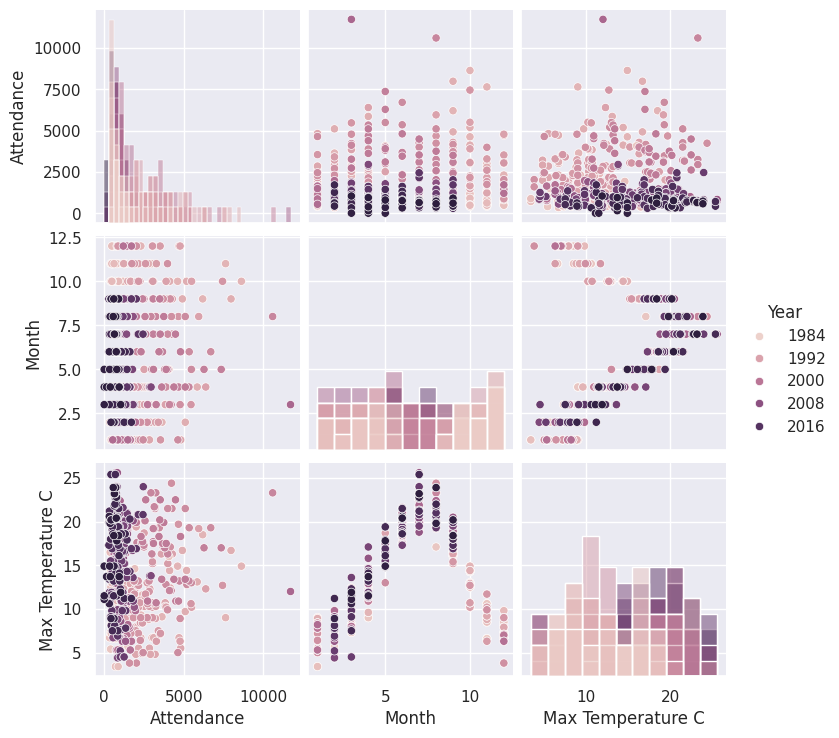

In [4]:
sns.pairplot(crowds, hue="Year", diag_kind="hist")

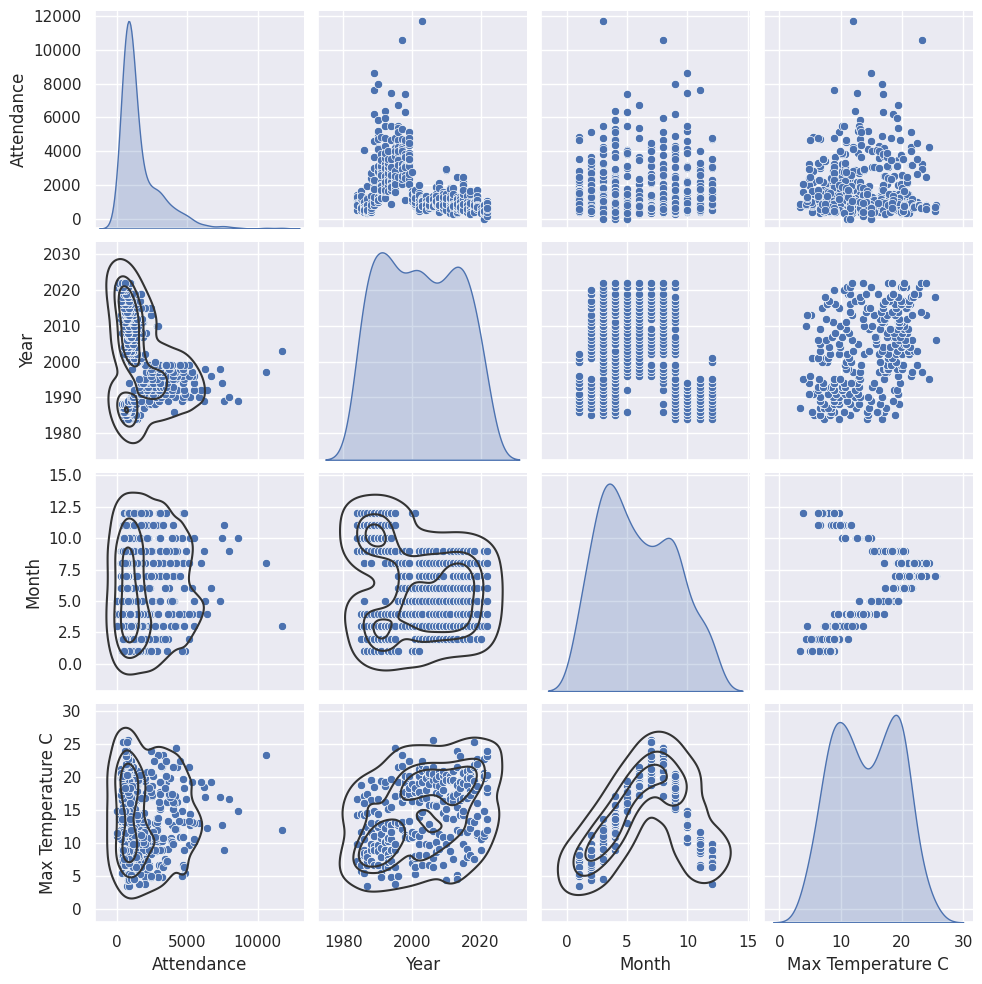

In [5]:
g = sns.pairplot(crowds, diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2")
g

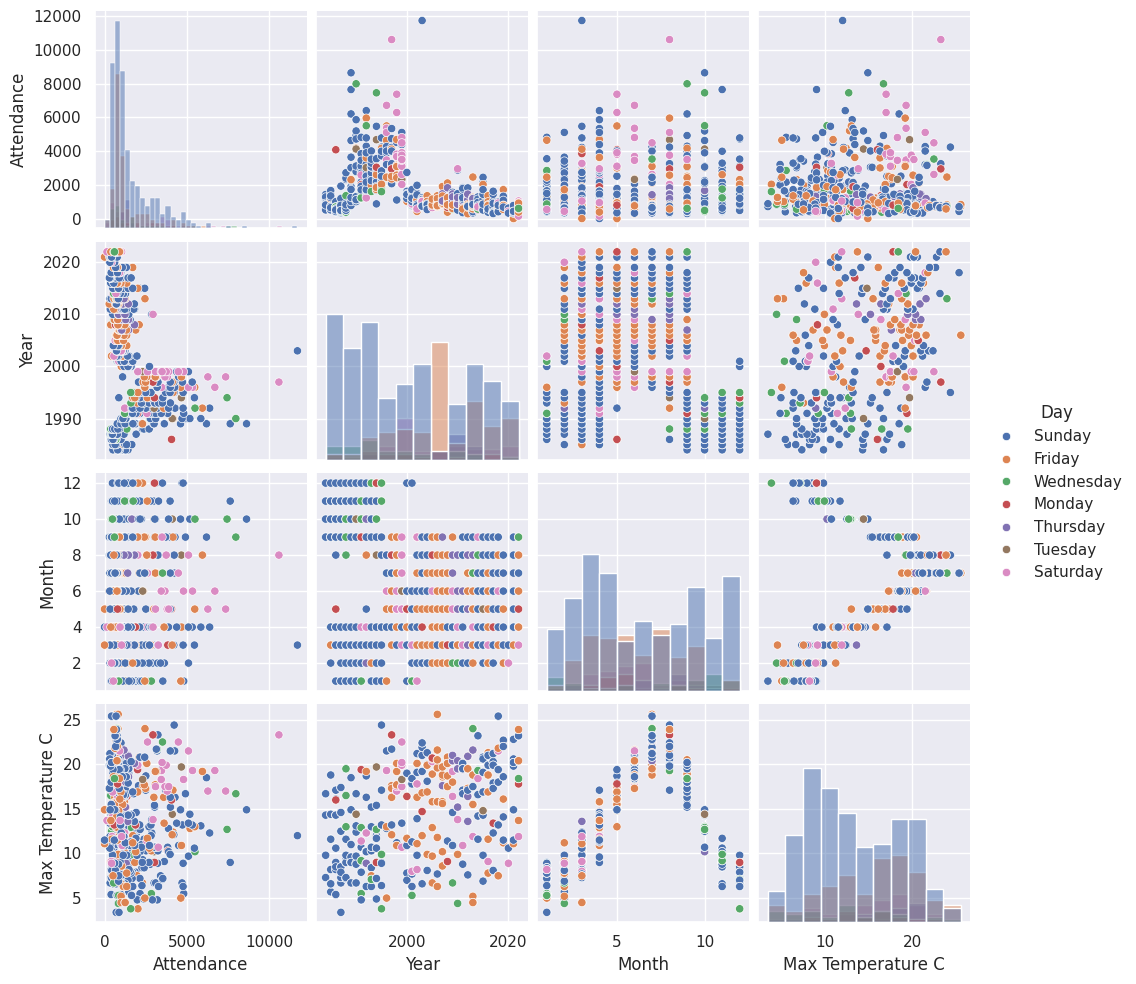

In [6]:
sns.pairplot(crowds, hue="Day", diag_kind="hist")

In [7]:
import numpy as np
import scipy.stats as stats
grouped = crowds.groupby('Year')
grouped


In [19]:
groupedagg = grouped.agg(
    mean_attendance = pd.NamedAgg(column='Attendance', aggfunc="mean"),
    std_attendance = pd.NamedAgg(column='Attendance', aggfunc="std"),
    min_attendance = pd.NamedAgg(column='Attendance', aggfunc="min"),
    max_attendance = pd.NamedAgg(column='Attendance', aggfunc="max"),
)
groupedagg

,mean_attendance,std_attendance,min_attendance,max_attendance
Year,,,,
1984,997.000000,269.200050,513,1425
1985,859.666667,396.222641,496,1658
1986,745.285714,774.938523,400,4076
1987,734.250000,413.849328,341,1922
1988,942.470588,773.476092,365,2716
1989,3109.937500,2464.179146,774,8636
1990,3682.466667,2045.823651,1002,7984
1991,2488.944444,965.317959,1226,4814
1992,3198.809524,1522.087567,1225,6393


In [32]:
#result = pd.concat([crowds, groupedagg], axis=1, join="inner")
crowds_scored = pd.merge(crowds, groupedagg, how="left", on=["Year"])
crowds_scored['Attendance (Normalised by Year)'] =  (crowds_scored['Attendance'] - crowds_scored['min_attendance'])/(crowds_scored['max_attendance']-crowds_scored['min_attendance'])
crowds_scored['Attendance (Standardised by Year)'] =  (crowds_scored['Attendance'] - crowds_scored['mean_attendance'])/crowds_scored['std_attendance']
crowds_scored

,Date,Opponents,Attendance,Year,Day,Month,Month Name,Max Temperature C,Min Temperature C,af days,Rain mm,sun hours,mean_attendance,std_attendance,min_attendance,max_attendance,Attendance (Normalised by Year),Attendance (Standardised by Year)
0,1984-09-02,Rochdale,1425,1984,Sunday,9,September,16.7,10.4,0,117.6,86.1,997.0,269.200050,513,1425,1.000000,1.589896
1,1984-09-09,Fulham,1145,1984,Sunday,9,September,16.7,10.4,0,117.6,86.1,997.0,269.200050,513,1425,0.692982,0.549777
2,1984-09-23,Salford,1159,1984,Sunday,9,September,16.7,10.4,0,117.6,86.1,997.0,269.200050,513,1425,0.708333,0.601783
3,1984-10-14,Runcorn,1076,1984,Sunday,10,October,14.3,7.7,0,82.7,75.6,997.0,269.200050,513,1425,0.617325,0.293462
4,1984-10-28,Bridgend,826,1984,Sunday,10,October,14.3,7.7,0,82.7,75.6,997.0,269.200050,513,1425,0.343202,-0.635215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,2022-07-24,Workington,644,2022,Sunday,7,July,23.2,14.5,0,23.8,187.8*,694.0,221.464605,150,1039,0.555681,-0.225770
584,2022-08-07,Whitehaven,727,2022,Sunday,8,August,23.9,13.6,0,56.4,234.5*,694.0,221.464605,150,1039,0.649044,0.149008
585,2022-08-12,Halifax,569,2022,Friday,8,August,23.9,13.6,0,56.4,234.5*,694.0,221.464605,150,1039,0.471316,-0.564424
586,2022-09-02,Featherstone,912,2022,Friday,9,September,18.4,11.1,0,50,124.8*,694.0,221.464605,150,1039,0.857143,0.984356


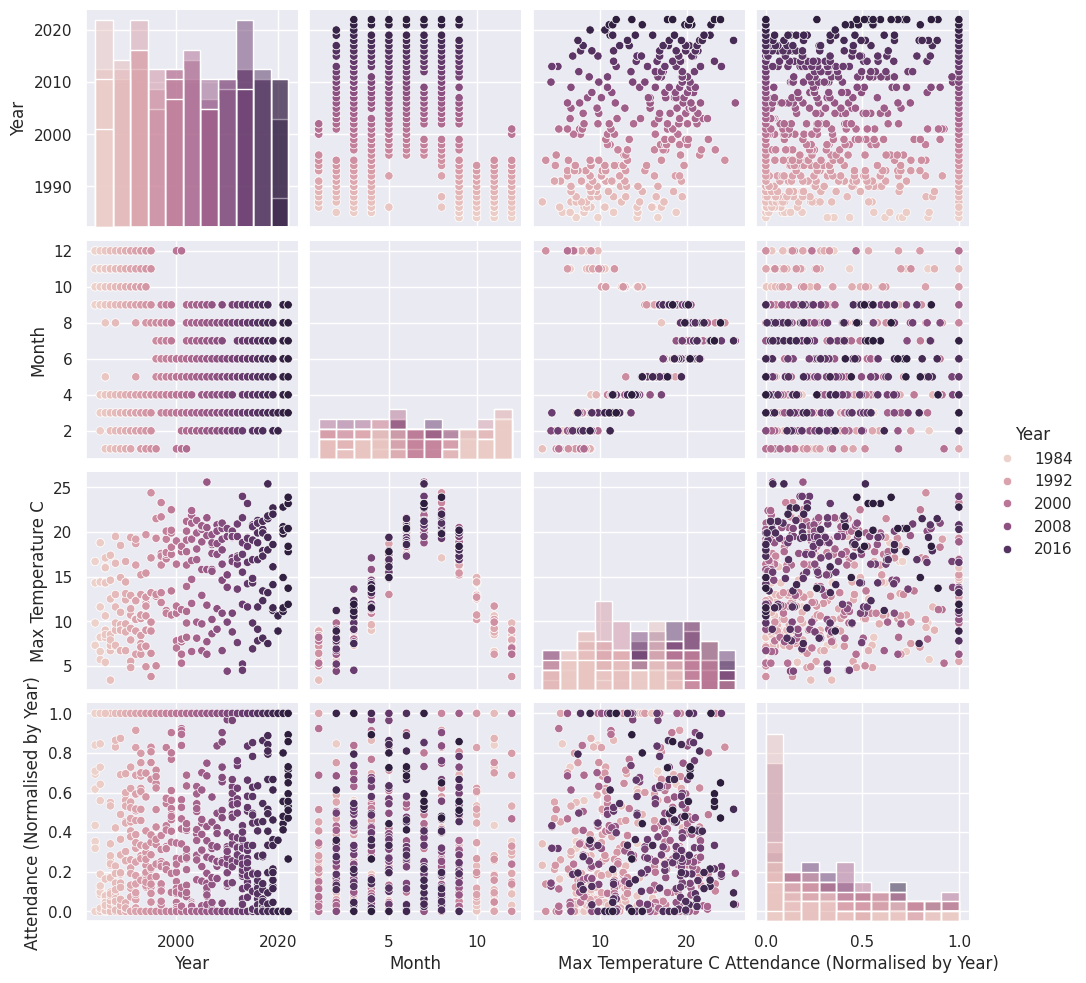

In [33]:
g = sns.pairplot(crowds_scored, diag_kind="hist", hue="Year", vars=["Year", "Month", "Max Temperature C", "Attendance (Normalised by Year)"])
#g.map_lower(sns.kdeplot, levels=4, color=".2")
g

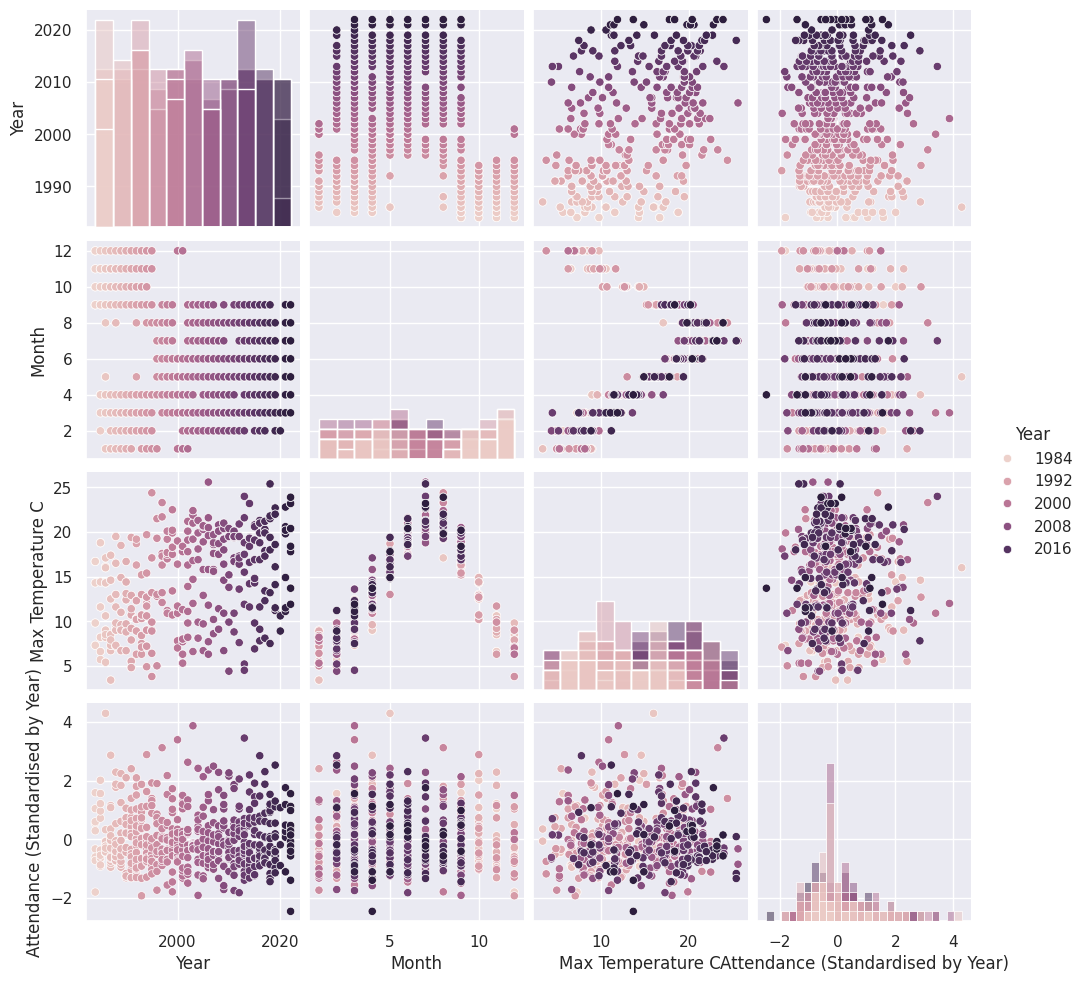

In [34]:
g = sns.pairplot(crowds_scored, diag_kind="hist", hue="Year", vars=["Year", "Month", "Max Temperature C", "Attendance (Standardised by Year)"])
g

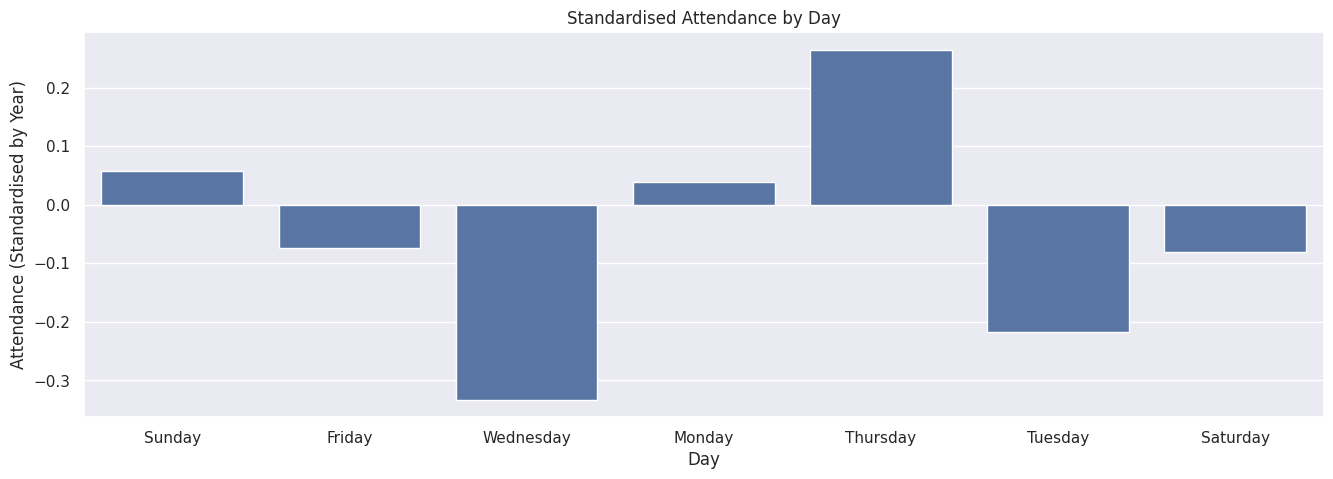

In [42]:
(
    sns.barplot(
        data=crowds_scored, x="Day", y="Attendance (Standardised by Year)",
        errorbar=None,
        estimator="mean"
    )
    .set(   title="Standardised Attendance by Day"
        )
)
#plt.xticks(rotation=90)
plt.show()

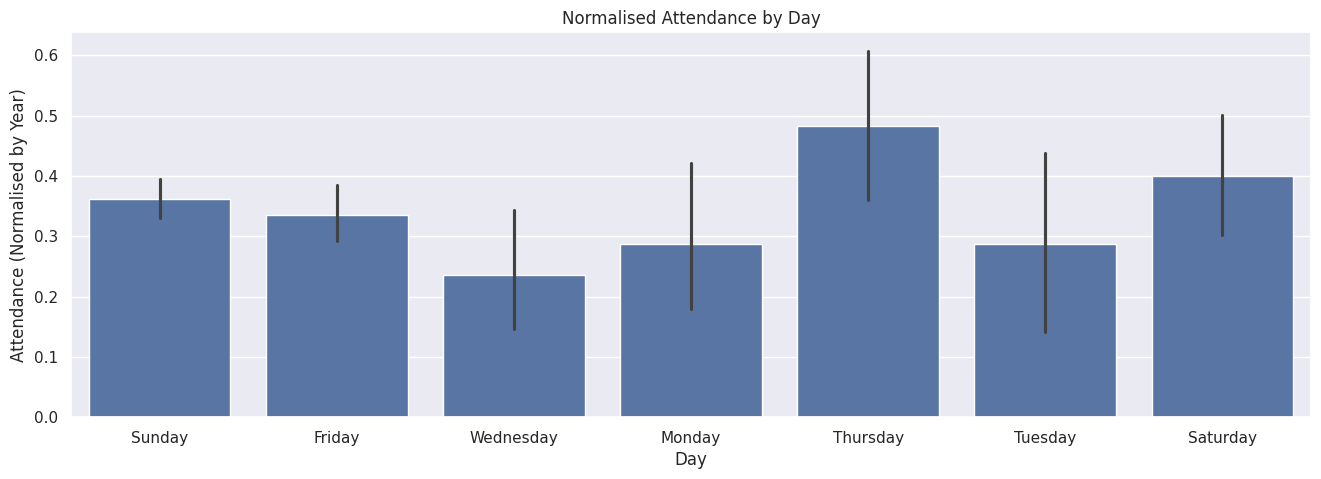

In [40]:
(
    sns.barplot(
        data=crowds_scored, x="Day", y="Attendance (Normalised by Year)",
        errorbar=None,
        estimator="mean"
    )
    .set(   title="Normalised Attendance by Day"
        )
)
#plt.xticks(rotation=90)
plt.show()

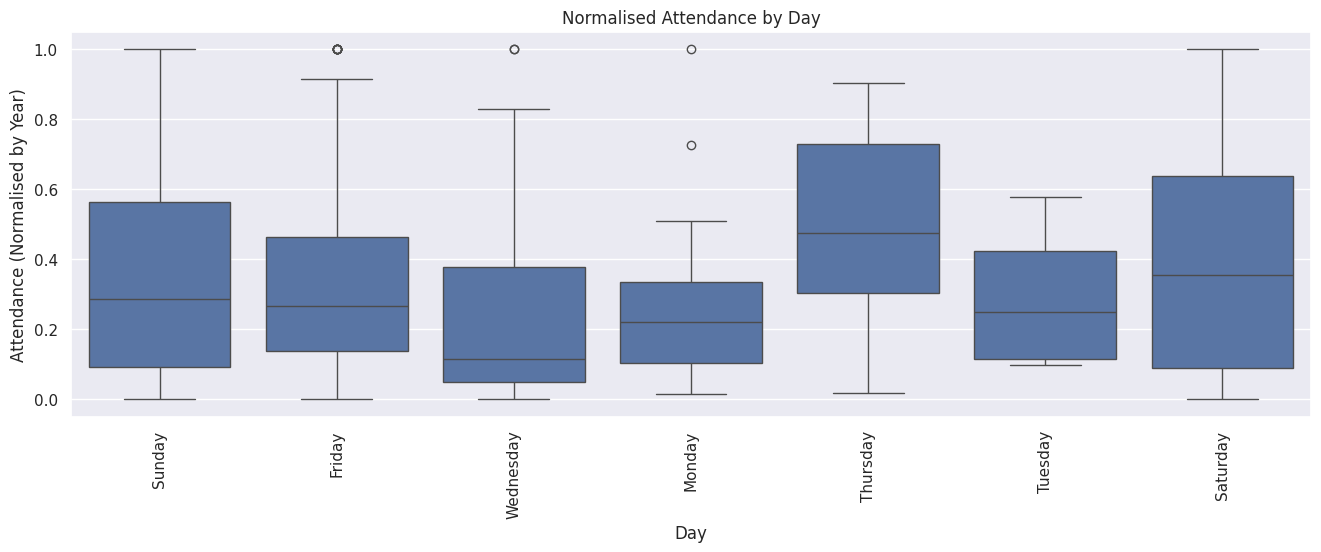

In [51]:
(
    sns.boxplot(
        data=crowds_scored, x="Day", y="Attendance (Normalised by Year)",
        #hue="Opponents",
    )
   .set(title="Normalised Attendance by Day")
)
plt.xticks(rotation=90)
plt.show()


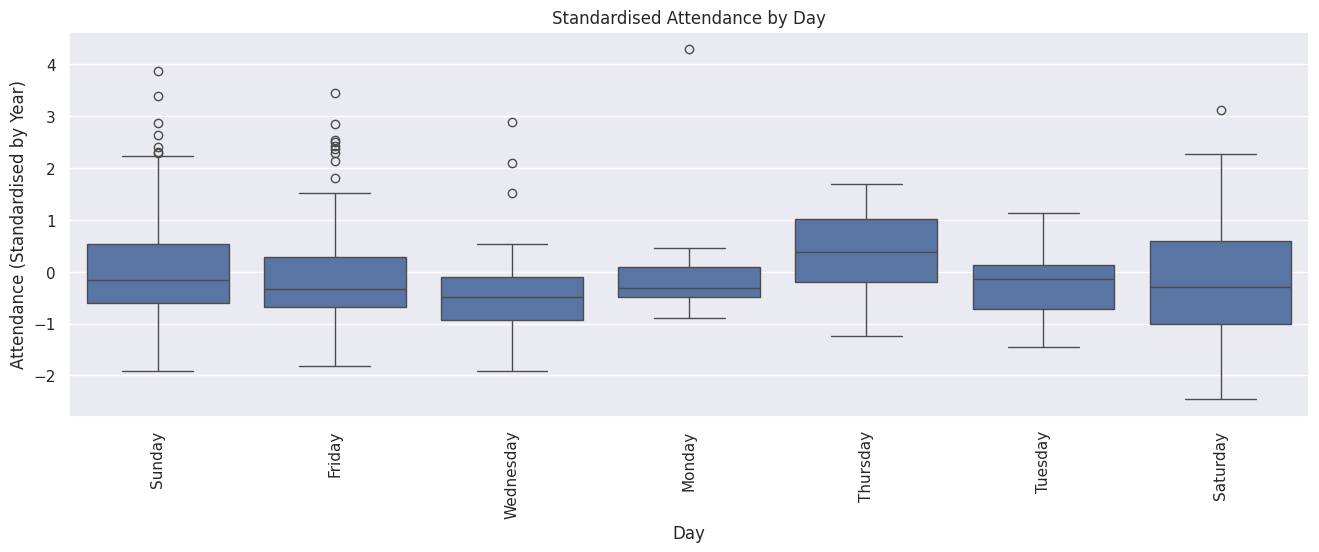

In [52]:
(
    sns.boxplot(
        data=crowds_scored, x="Day", y="Attendance (Standardised by Year)",
        #hue="Opponents",
    )
   .set(title="Standardised Attendance by Day")
)
plt.xticks(rotation=90)
plt.show()

In [ ]:

### try to normailse data by year to then be able to see patterns

## https://towardsdatascience.com/normalizing-features-within-groups-9873071f7e60




In [ ]:
(
    sns.barplot(
        data=crowds, x="Opponents", y="Attendance",
        estimator="mean", 
        errorbar= None # ("pi",100), #Percentile 
    )
    .set(   title="Average Attendance by Opponent"
        )
)
plt.xticks(rotation=90)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

(
    sns.barplot(
        data=crowds, x="Year", y="Attendance",
        estimator="mean", errorbar=("pi",100),
        
    )
    .set(title="Average Attendance by Year")
)
plt.xticks(rotation=90)
plt.show()

In [ ]:
(
    sns.boxplot(
        data=crowds, x="Year", y="Attendance",
        #hue="Opponents",
    )
   .set(title="Attendance by Year")
)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# sns.displot(crowds, x="Attendance", hue="Year", multiple="stack")

In [ ]:
stadiums = pd.read_csv("../data/eagles/stadiums_with_latlong.csv")
stadiums

In [ ]:
questionnaire = pd.read_csv("../data/eagles/questionnaire_quantitive.csv")
questionnaire

In [ ]:
import folium 
from folium import plugins
from folium.plugins import HeatMap

In [ ]:
start_coords = (46.9540700, 142.7360300);
    
m = folium.Map(
    location=start_coords, 
    zoom_start=14, 
    #tiles="Stamen Terrain",
    width="100%", height="100%",
    control_scale=True,
);

only_located = questionnaire[["Are you:","Latitude", "Longitude"]].dropna()


only_located


In [ ]:
only_located_fans = only_located[only_located["Are you:"].str.contains("A current Sheffield Eagles fan who attends games")]

In [ ]:

heat_data = [[row["Latitude"],row["Longitude"]] for index, row in only_located_fans.iterrows() if "Latitude" in row and "Longitude" in row]

HeatMap(heat_data).add_to(m)


m.fit_bounds(m.get_bounds(), padding=(30, 30))

folium.TileLayer('cartodbpositron').add_to(m)
folium.TileLayer('openstreetmap').add_to(m)

# Add the option to switch tiles
folium.LayerControl().add_to(m)

fs = plugins.Fullscreen().add_to(m)

gc = plugins.Geocoder(collapsed=True, position='topleft', add_marker=True).add_to(m)

mc = plugins.MeasureControl( position='topleft').add_to(m)


m